In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import mglearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering 
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.cluster.hierarchy import ward
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import warnings
warnings.simplefilter(action='ignore')


In [2]:
path = 'Dataset/Mall_Customers/Mall_Customers.csv'
df=pd.read_csv(path)
df.columns = ['customer_ID','gender','age','annual_income','spending_score']

In [3]:
df.head()

customer_ID  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40

In [4]:
df.shape

(200, 5)

In [5]:
# Data Cleaning
# Checking for dupliocate entry
df.duplicated().any()

False

In [6]:
#Checking for missing values
df.isnull().any()

customer_ID       False
gender            False
age               False
annual_income     False
spending_score    False
dtype: bool

In [7]:
#Changing the index of the dataset to 'customer_ID' since 'customer_ID' will not provide us any information
df = df.set_index(['customer_ID'])
df.head()

gender  age  annual_income  spending_score
customer_ID                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
4            Female   23             16              77
5            Female   31             17              40

In [8]:
#EDA 
df.describe()

age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000

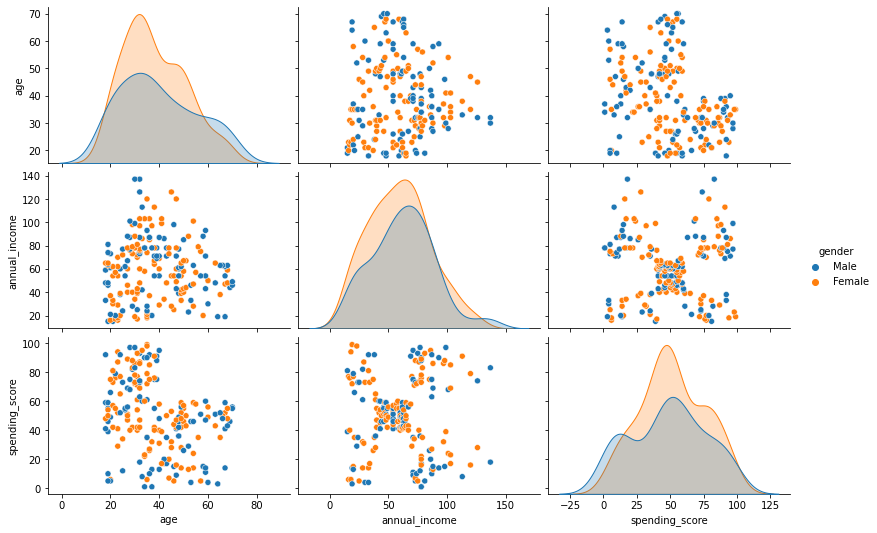

In [9]:
#EDA
sns.pairplot(df, hue='gender',aspect = 1.5)
plt.show()

<AxesSubplot:title={'center':'Plotting records by borough'}>

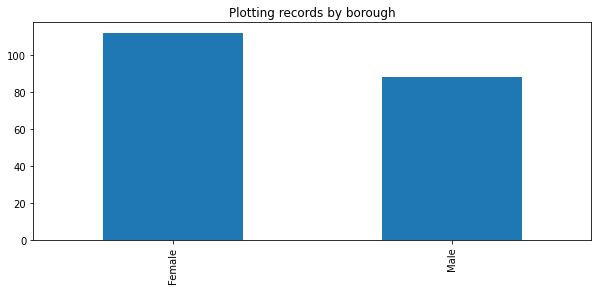

In [10]:
df['gender'].value_counts().plot(kind='bar', title='Plotting records by borough', figsize=(10, 4),align='center')

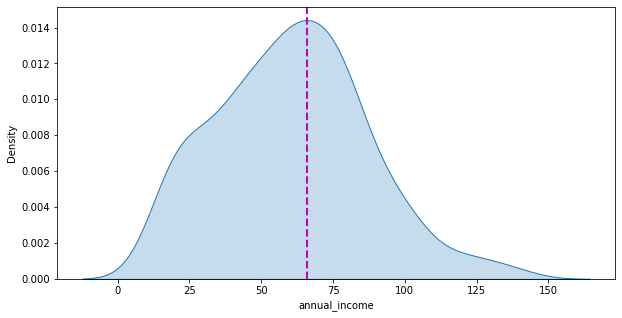

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['annual_income'],
             hist=False,
             kde_kws={'shade':True},
            ax = ax)
ax.axvline(x= 66, color='m', linestyle='--', linewidth=2)

In [12]:
# Dropping the 'gender' column
X = df.drop(['gender'], axis=1)
X.head()

age  annual_income  spending_score
customer_ID                                    
1             19             15              39
2             21             15              81
3             20             16               6
4             23             16              77
5             31             17              40

In [13]:
clusters = []
ss = []

#Calculate all the sum of within-cluster variance for n_clusters from 2 to 14

for i in range(2,15):
    km = KMeans(n_clusters = i)
    km.fit(X)
    clusters.append(km.inertia_)
    ss.append(silhouette_score(X, km.labels_, metric='euclidean'))

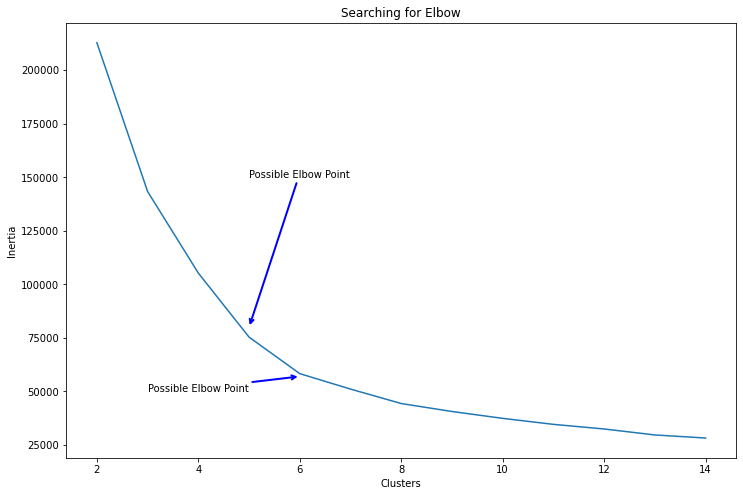

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(6, 57000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Text(0, 0.5, 'Silhouette Score')

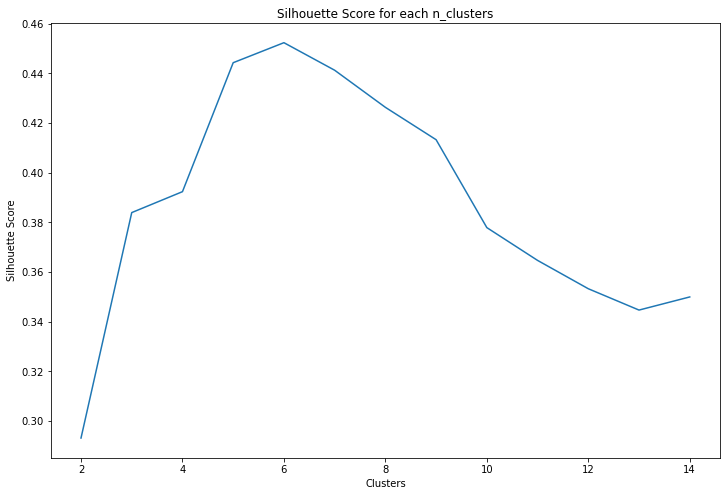

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=ss, ax=ax)
ax.set_title('Silhouette Score for each n_clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

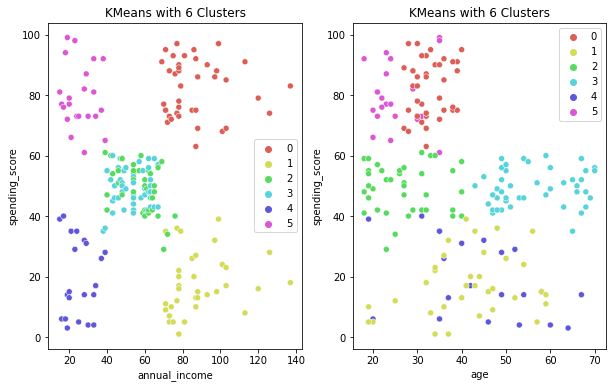

In [16]:
km6 = KMeans(n_clusters=6).fit(X)

X['Labels'] = km6.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 6 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 6 Clusters')
ax.legend(loc='upper right')

plt.show()

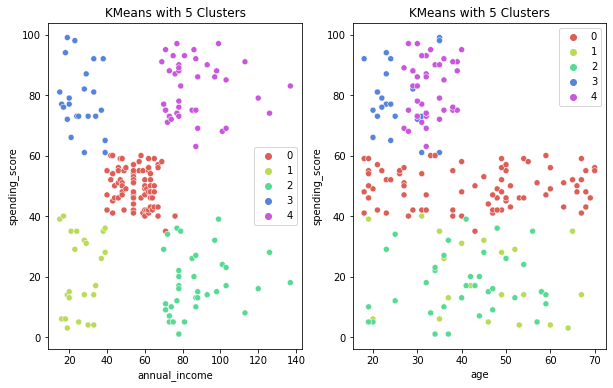

In [17]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')
ax.legend(loc='upper right')
plt.show()

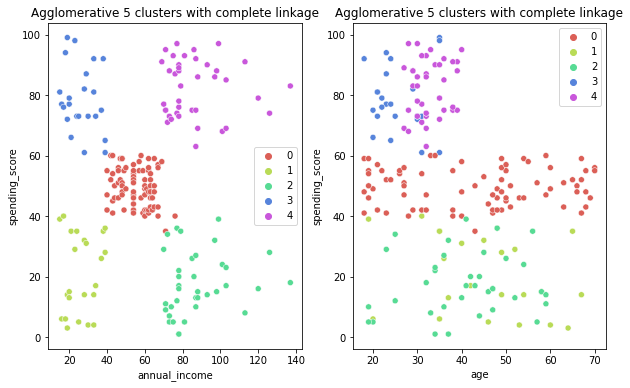

In [18]:
# Hierachical clustering(Agglomerative approach) with complete 
aggloclus = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)

labels = aggloclus.labels_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with complete linkage')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with complete linkage')
ax.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Feature 1')

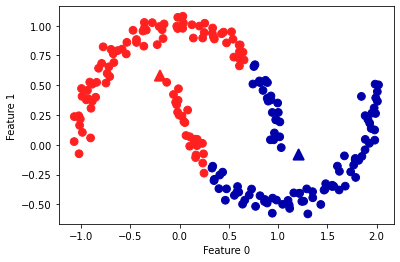

In [19]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)
  

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

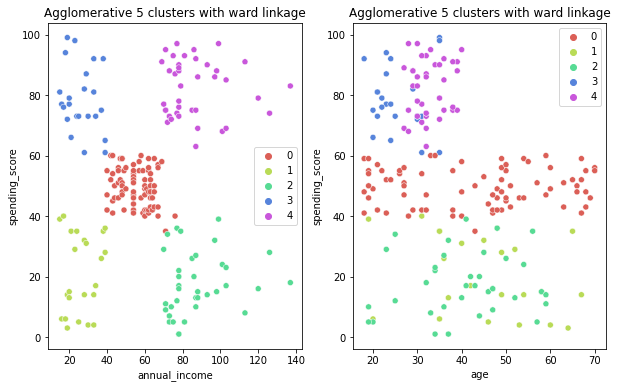

In [20]:
# Hierachical clustering(Agglomerative approach) ward linkage

aggloclus = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with ward linkage')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative 5 clusters with ward linkage')
ax.legend(loc='upper right')
plt.show()

In [21]:
linkage = ward(X)
fig = ff.create_dendrogram(linkage, color_threshold = 260)
fig.update_layout(width = 1000, height = 600, yaxis_title = 'Cluster distance', xaxis_title = 'Sample index')
fig.update_xaxes(showticklabels=False)
fig.add_shape(
        type='line',
        x0=0,
        y0=260,
        x1=1985,
        y1=260,
        line=dict(
            color='Black',
            dash='dash'
        )
)
fig.show()

Text(0, 0.5, 'Feature 1')

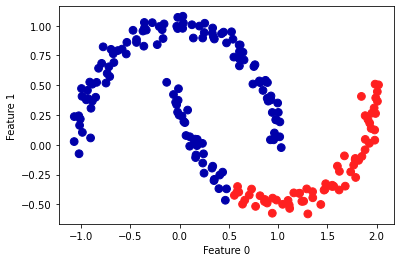

In [22]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
agglo =  AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred = agglo.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

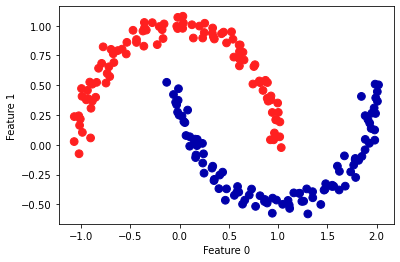

In [23]:
agglo =  AgglomerativeClustering(n_clusters=2, linkage='single')
y_pred = agglo.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

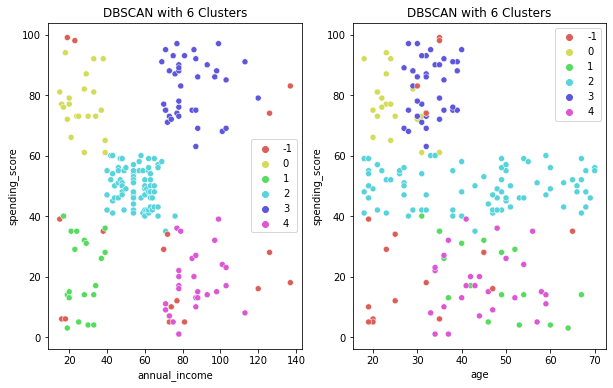

In [24]:
# DBSCAN(Density Based Spatial Clustering of Application with Noise)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps = 0.7)
clusters = dbscan.fit_predict(X_scaled)
length = len(np.unique(clusters))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(X['annual_income'], X['spending_score'], hue=clusters, 
                palette=sns.color_palette('hls', length))
ax.set_title('DBSCAN with 6 Clusters')
ax.legend(loc='center right')


ax = fig.add_subplot(122)
sns.scatterplot(X['age'], X['spending_score'], hue=clusters, 
                palette=sns.color_palette('hls', length))
ax.set_title('DBSCAN with 6 Clusters')
ax.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Feature 1')

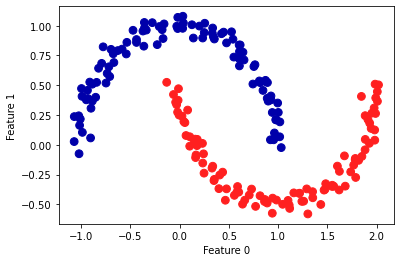

In [25]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

x_scaled = scaler.fit_transform(x)
# cluster the data into two clusters
dbscan = DBSCAN(eps=0.3, min_samples=3) 
y_pred = dbscan.fit_predict(x_scaled)
  
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")